In [1]:
import PID
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import spline

In [2]:
def test_pid(P = 0.2,  I = 0.0, D= 0.0, L=100):
    """Self-test PID class
    .. note::
        ...
        for i in range(1, END):
            pid.update(feedback)
            output = pid.output
            if pid.SetPoint > 0:
                feedback += (output - (1/i))
            if i>9:
                pid.SetPoint = 1
            time.sleep(0.02)
        ---
    """
    pid = PID.PID(P, I, D)

    pid.SetPoint=0.0
    pid.setSampleTime(0.01)

    END = L
    feedback = 0

    feedback_list = []
    time_list = []
    setpoint_list = []

    for i in range(1, END):
        pid.update(feedback)
        output = pid.output
        if pid.SetPoint > 0:
            feedback += (output - (1/i))
        if i>9:
            pid.SetPoint = 1
        time.sleep(0.02)

        feedback_list.append(feedback)
        setpoint_list.append(pid.SetPoint)
        time_list.append(i)

    time_sm = np.array(time_list)
    time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)
    feedback_smooth = spline(time_list, feedback_list, time_smooth)

    plt.plot(time_smooth, feedback_smooth)
    plt.plot(time_list, setpoint_list)
    plt.xlim((0, L))
    plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
    plt.xlabel('time (s)')
    plt.ylabel('PID (PV)')
    plt.title('TEST PID')

    plt.ylim((1-0.5, 1+0.5))

    plt.grid(True)
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


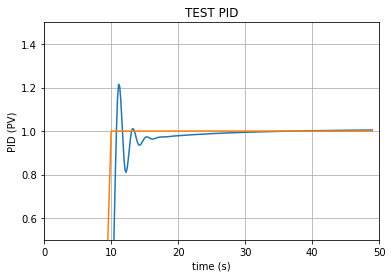

In [3]:
if __name__ == "__main__":
    test_pid(1.2, 1, 0.001, L=50)